Manufacturing label position: (0.0, 3289.0)


/tmp/ipykernel_15035/2951669784.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=df_all, x="Industry", y="Total", palette=palette)
/tmp/ipykernel_15035/2951669784.py:106: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bars.set_xticklabels(df_all["Industry"], rotation=45, ha='right', fontsize=12)
/tmp/ipykernel_15035/2951669784.py:107: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bars.set_yticklabels(bars.get_yticks(), fontsize=22)


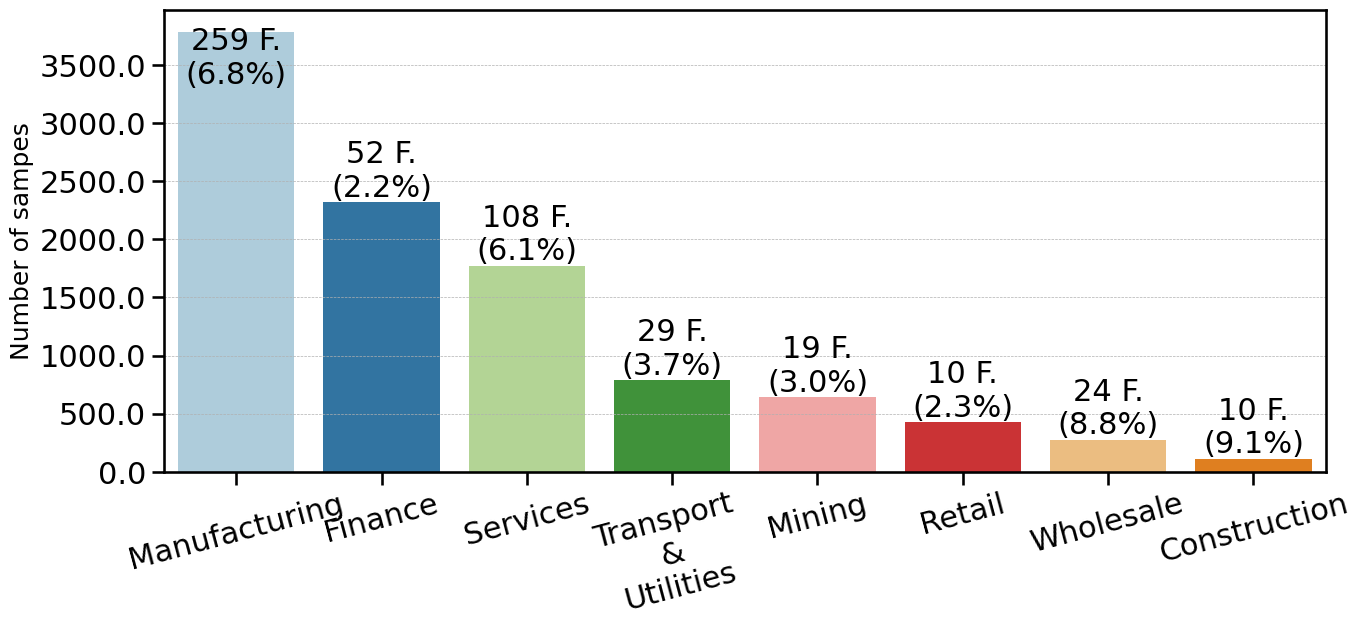

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Data from folds 1 to 5
folds = [
    {
        10: 124, 15: 14, 20: 778, 40: 156, 50: 49, 52: 81, 60: 494, 70: 336
    },
    {
        10: 132, 15: 14, 20: 768, 40: 161, 50: 77, 52: 83, 60: 443, 70: 335
    },
    {
        10: 127, 15: 20, 20: 736, 40: 170, 50: 50, 52: 86, 60: 466, 70: 370
    },
    {
        10: 123, 15: 19, 20: 780, 40: 157, 50: 46, 52: 82, 60: 457, 70: 352
    },
    {
        10: 134, 15: 43, 20: 727, 40: 142, 50: 52, 52: 94, 60: 460, 70: 377
    }
]

frauds = [
    {10: 4, 20: 65, 40: 10, 60: 27, 70: 8},
    {20: 59, 40: 4, 50: 23, 52: 1, 60: 1, 70: 5},
    {20: 42, 40: 9, 50: 1, 60: 8, 70: 41},
    {10: 4, 20: 64, 40: 5, 60: 7, 70: 16},
    {10: 11, 15: 10, 20: 29, 40: 1, 52: 9, 60: 9, 70: 38}
]

# Sum over all folds
from collections import defaultdict

total_industry = defaultdict(int)
total_fraud = defaultdict(int)

for fold, fraud in zip(folds, frauds):
    for k, v in fold.items():
        total_industry[k] += v
    for k, v in fraud.items():
        total_fraud[k] += v

# Industry titles from the mapping
industry_map = {
    # 0: "Agriculture",
    10: "Mining",
    15: "Construction",
    20: "Manufacturing",
    40: "Transportation & Public Utilities",
    50: "Wholesale Trade",
    52: "Retail Trade",
    60: "Finance",
    70: "Services",
    # 90: "Public Admin"
}

industry_renamining = {
    "Mining": "Mining",
    "Construction": "Construction",
    "Manufacturing": "Manufacturing",
    "Transportation & Public Utilities": "Transport\n&\nUtilities",
    "Wholesale Trade": "Wholesale",
    "Retail Trade": "Retail",
    "Finance": "Finance",
    "Services": "Services"
}

# Prepare dataframe
data = []
for ind_code, total in total_industry.items():
    fraud = total_fraud.get(ind_code, 0)
    fraud_pct = 100 * fraud / total if total > 0 else 0
    label = f"{fraud} F.\n({fraud_pct:.1f}%)"
    data.append((industry_map.get(ind_code, str(ind_code)), total, fraud, label))

df_all = pd.DataFrame(data, columns=["Industry", "Total", "Fraud", "Label"])
df_all.sort_values("Total", ascending=False, inplace=True)

# Plot with large font sizes
plt.figure(figsize=(15, 6))
sns.set_context("talk")  # larger font context
palette = sns.color_palette("Paired", len(df_all))
df_all["Total"] = df_all["Total"].astype(int)
bars = sns.barplot(data=df_all, x="Industry", y="Total", palette=palette)

# Annotate
for bar, label in zip(bars.patches, df_all["Label"]):
    height = bar.get_height()
    
    pos= (bar.get_x() + bar.get_width() / 2, height)
    
    
    if "259" in label:
        pos = (pos[0], height-500)
        print("Manufacturing label position:", pos)

    
    bars.annotate(label, pos,
                  ha='center', va='bottom', fontsize=22)

# Text wrap of x-ticks for max 10 character per line
def wrap_text(text, max_length=10):
    return '\n'.join(text[i:i + max_length] for i in range(0, len(text), max_length))
df_all["Industry"] = df_all["Industry"].replace(industry_renamining)
# df_all["Industry"] = df_all["Industry"].apply(lambda x: wrap_text(x, 10))   
bars.set_xticklabels(df_all["Industry"], rotation=45, ha='right', fontsize=12)
bars.set_yticklabels(bars.get_yticks(), fontsize=22)

plt.xticks(rotation=15, ha='center', fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('')
plt.ylabel('Number of sampes')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()
